In [1]:
import pandas as pd
import numpy as np
from Higgs.tools.ImplementationUtils import (
    implementChannelLimit,
    readHEPDataCsv,
    fromHB5Table1,
)
from Higgs import bounds as HB
from Higgs.tools.LimitValidation import validateChannelLimit
import os, sys

sys.path.insert(0, os.path.dirname(os.path.dirname(os.getcwd())))
import MassResolutions as resolution


# ATLAS 13TeV LHC

## `vbfHp > WZ` [1806.01532](https://arxiv.org/abs/1806.01532)

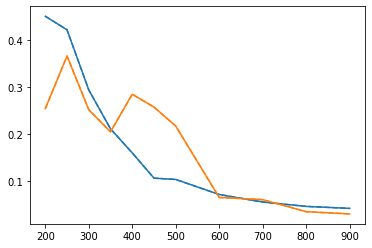

Looks good. Saving this to vbfHpm_LHC13_ATLAS_36.json


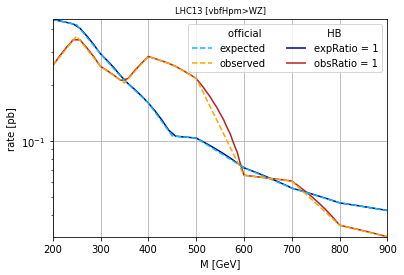

In [4]:
dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins1676472/Table%208/2/csv",
    skip=1
)

df = dfs[0].rename(
    columns={"Mass [GeV]": "m", "Cross section upper limit at 95% CL [pb]": "obs"}
)
df["exp"] = dfs[1]["Cross section upper limit at 95% CL [pb]"]

df.obs *= 1e-3  # fb to pb
df.exp *= 1e-3

limitFile = implementChannelLimit(
    "1806.01532",
    {"channels": [["vbfHpm", "WZ"]]},
    "https://doi.org/10.17182/hepdata.82546.v2/t8",
    df,
    massResolution=resolution.massRes(5, 4e-2),  # they say not better than 4% on p. 2
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)    

# ATLAS 8TeV LHC

## `vbfHp > WZ` [1503.04233](https://arxiv.org/abs/1807.07915)

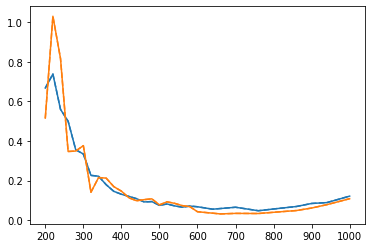

Looks good. Saving this to vbfHpm_LHC8_ATLAS_20.json


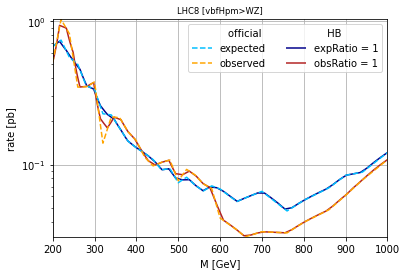

In [19]:
df = fromHB5Table1("1504233_Atlas_Hplus_VBF-WZ_20.3fb-1", "ATLAS")
df.obs *= 1e-3  # fb to pb
df.exp *= 1e-3
limitFile = implementChannelLimit(
    "1503.04233",
    {"channels": [["vbfHpm", "WZ"]]},
    "Fig. 2",
    df,
    massResolution=resolution.massRes(5, 2.4e-2),  # p. 3
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)


## `H+ -> WZ` [2207.03925](https://arxiv.org/abs/2207.03925)

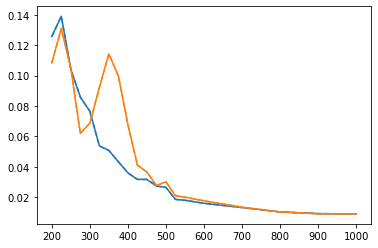

Looks good. Saving this to vbfHpm_LHC13_ATLAS_139.json


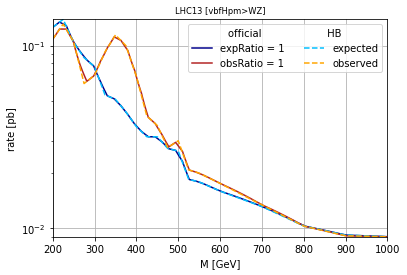

In [15]:

dfs = readHEPDataCsv(
    "https://www.hepdata.net/download/table/ins2107940/Table%2014/1/csv"
)

df = dfs[0].rename(
    columns={"mWZ [GeV]": "m", "observed limit [fb]": "obs"}
)
df["exp"] = dfs[1]["expected limit [fb]"]

df.obs *= 1e-3  # fb to pb
df.exp *= 1e-3

limitFile = implementChannelLimit(
    "2107940",
    {"channels": [["vbfHpm", "WZ"]]},
    "Fig.9(a)",
    df,
    massResolution=resolution.massRes(5, 5e-2),  
)
lim = HB.Limit(limitFile)
fig, ax = validateChannelLimit(lim)    